In [1]:
### IMPORT SCIENTIFIC LIBRARIES ###
import numpy as np
import pandas as pd
from scipy import sparse
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
plt.rcParams['font.size'], plt.rcParams['axes.labelsize'] = 14, 18
#%matplotlib widget

import os, sys, importlib
sys.path.append('./XPCS_library/')

import ID10_tools as ID10
from ID10_tools import Nx, Ny, Npx
ID10.set_version('v2')

import XPCS_tools as XPCS
from XPCS_tools import E2lambda, lambda2E, theta2Q, Q2theta, decorrelation_f
XPCS.set_beamline('ID10')

import COSMICRAY_tools as COSMIC
COSMIC.set_beamline('ID10')

# RAW FOLDER PATH
raw_folder = '../RAW_DATA/'
mask_folder = '../masks/'
fit_out_folder = './data/fit_outs/'
Idt_folder = './data/Idts/'
g2_folder = './data/g2/'

# EXPERIMENTAL VARIABLES
XPCS.set_expvar(1350, 1350, 7)
ID10.Nfmax_dense_file = 2000
ID10.Nfmax_sparse_file = 5000

## Load masks

In [2]:
e4m_htmask = np.load(mask_folder+'e4m_htmask_copper_foil_30um_1_1'+'.npy')
e4m_mask = np.load(mask_folder+'e4m_mask'+'.npy')

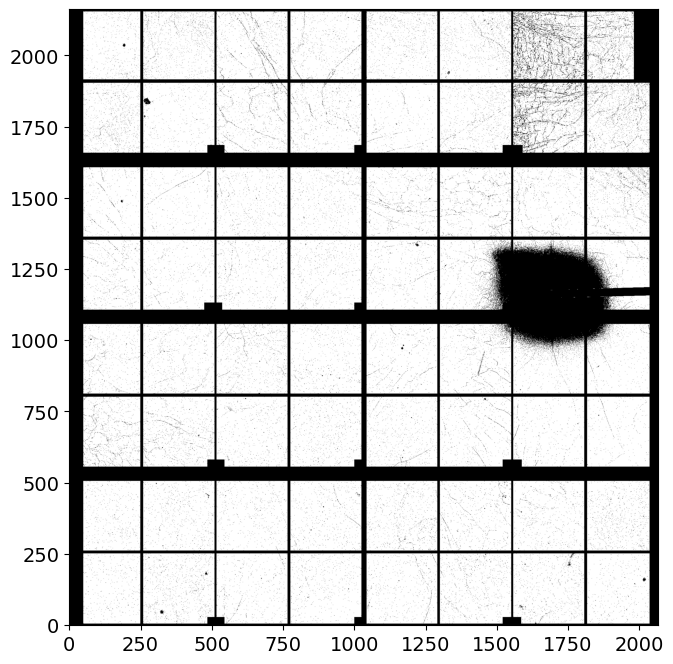

In [3]:
plt.figure(figsize=(8, 8))
plt.imshow((e4m_mask*e4m_htmask).reshape(Nx,Ny), cmap='gray', origin='lower')

## Beamstop mask
Using a random scan in GeO2_6, because we are not changing the measurement configuration

In [4]:
#######################################
sample_name = 'GeO2_6'
Ndataset = 1
Nscan =12
Nfi, Nff = 0, 1000
#######################################

scan = ID10.load_scan(raw_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
theta = scan['delcoup']
Q = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('theta =', theta)
print('Q =', Q)
print('#############################\n')

e4m_data = ID10.load_sparse_e4m(raw_folder, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )

#############################
command = mtimescan 0.02 1 220000
Ei = 9.699998837562536
itime = 0.0201
theta = 1.7500000000000004
Q = 0.15
#############################

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/1 loops)
Done! (elapsed time = 0.27 s)
Concatenating vectors ...
Done! (elapsed time = 0.07 s)
	 | Sparse array loaded from ../RAW_DATA/GeO2_6/GeO2_6_0001/scan0012/
	 | Shape:       (1000, 4471016)
	 | Sparsity:     3.8e-03
	 | Memory usage (scipy.csr_array): 0.192 GB (np.array usage: 16.656 GB)


################################################################################
Maximum count in the hull run -> 4689.0
# of pixels above Ith_high treshold ->  75 pixels (of 4471016 => 0.0 %)
################################################################################



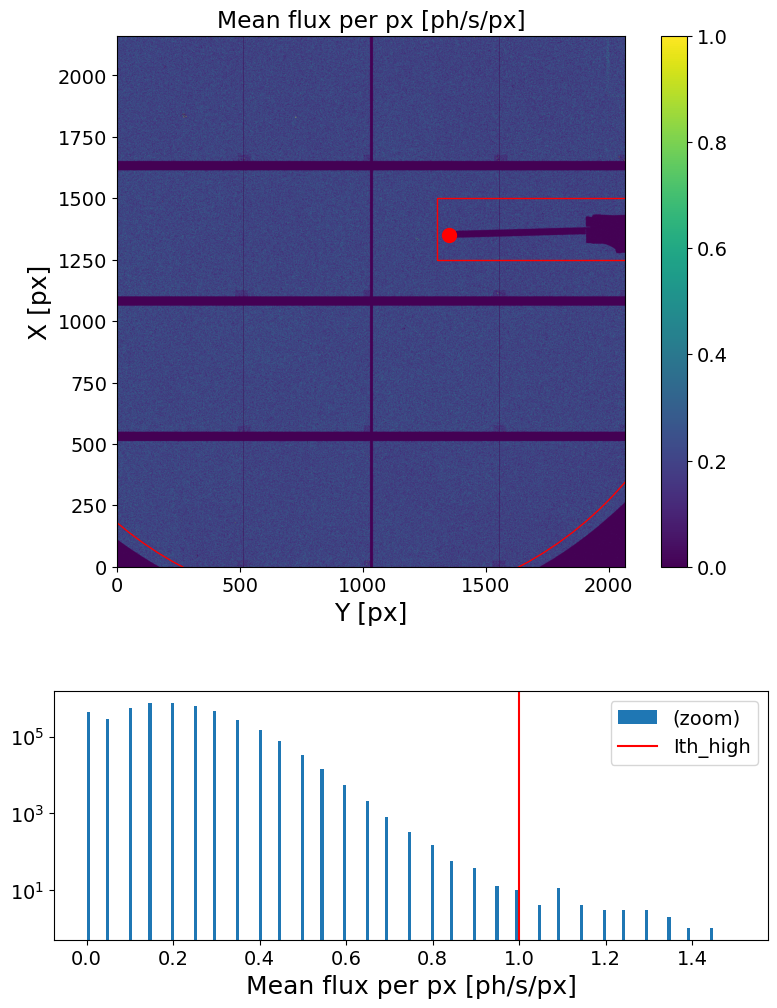

In [5]:
geom = [{'geom':'Rectangle', 'x0':1250, 'y0':1300, 'xl':250, 'yl':1950, 'inside':False},
        {'geom':'Circle', 'Cx':1300, 'Cy':950, 'r':1470, 'inside':True}, 
        ]
XPCS.gen_plots4mask(e4m_data, itime, Ith_high=1, Nff=10000, mask_geom=geom,)

#################################################
Masked area =  93.74594052000708 %
#################################################



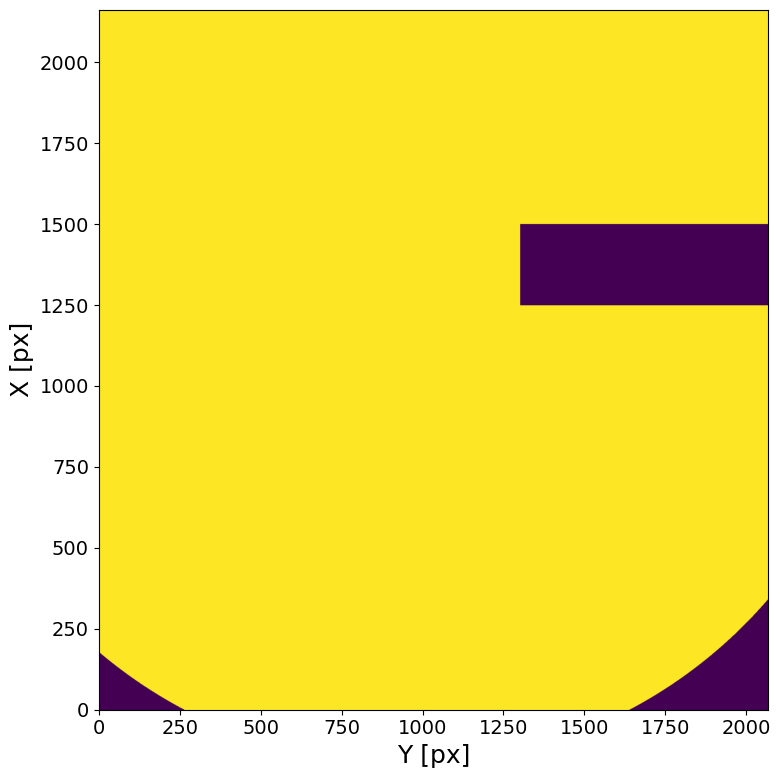

In [6]:
bs_mask = XPCS.gen_mask(mask_geom=geom)

##  XPCS scan (Q =  0.19 Å$^{-1}$, delcoup = 1.75, 30 min @ 1ms (150000 frames (stoped)) (GeO2_6q_delcoup1.75, dataset 1, scan 1) T = 30 $^{\circ}C $

In [7]:
#######################################
sample_name = 'GeO2_6q_delcoup_1.75'
Ndataset = 1
Nscan = 1
Nfi, Nff = None, None
#######################################

scan = ID10.load_scan(raw_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
theta = scan['delcoup']
Q = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('theta =', theta)
print('Q =', Q)
print('#############################\n')

e4m_data = ID10.load_sparse_e4m(raw_folder, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )
e4m_data = COSMIC.fast_gamma_filter(e4m_data, Imaxth_high=5)

#############################
command = mtimescan 0.001 1 3599664
Ei = 9.699998837562536
itime = 0.0011
theta = 1.7500000000000004
Q = 0.15
#############################

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00001.h5 (2/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00002.h5 (3/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00003.h5 (4/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00004.h5 (5/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00005.h5 (6/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00006.h5 (7/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00007.h5 (8/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00008.h5 (9/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00009.h5 (10/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00010.h5 (11/29 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00011.h5 (12/29 loops)
	 -> load

### Qmask

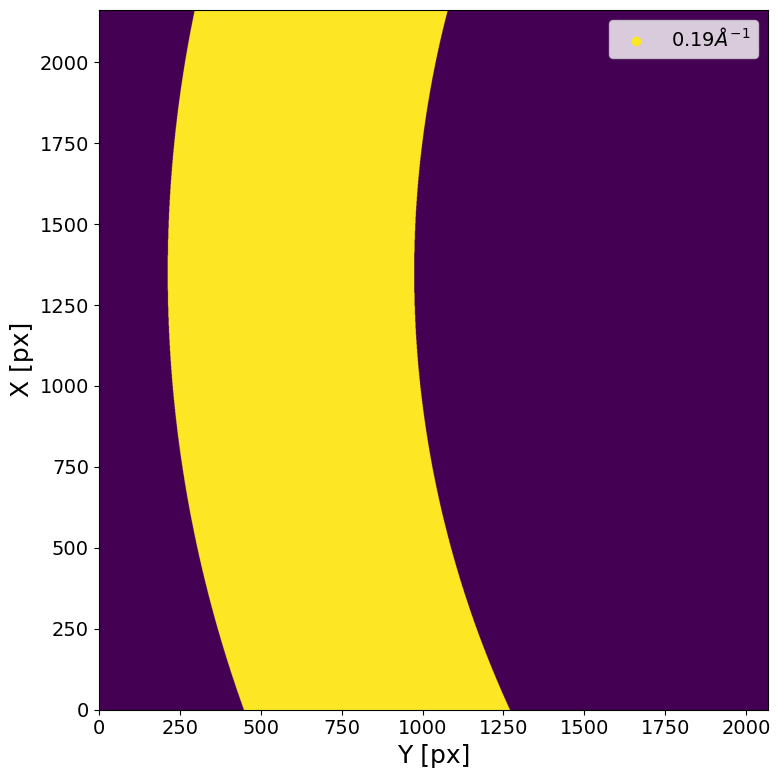

In [8]:
###################
Q    = .19
Qres = .02
###################

Qmask = XPCS.gen_Qmask(Ei, theta, Q, Qres, Qmap_plot=False)

### Flux check

################################################################################
Maximum count in the hull run -> 5.0
# of pixels above Ith_high treshold ->  11 pixels (of 4471016 => 0.0 %)
################################################################################



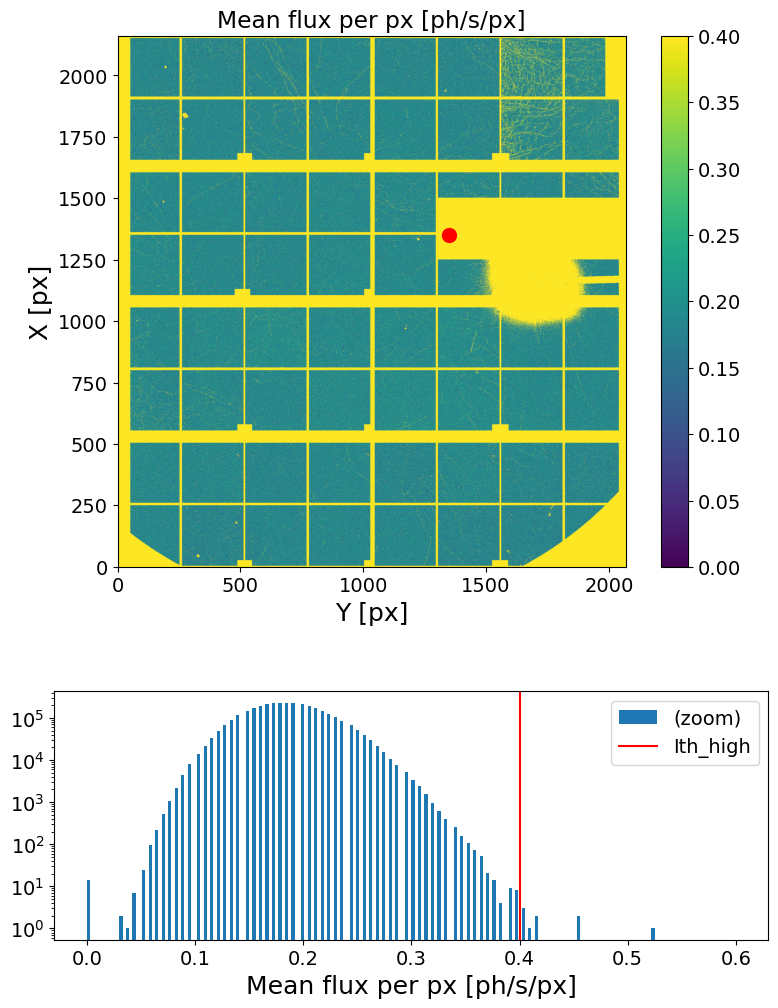

In [9]:
XPCS.gen_plots4mask(e4m_data, itime, Ith_high=.4, Nff=1000000, mask=e4m_mask*e4m_htmask*bs_mask)

### Intensity analysis

In [10]:
####################
Lbin = 1
Nstep = 1
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
####################

t_It, It = XPCS.get_It(e4m_data, itime, mask=mask, Lbin=Lbin, Nstep=Nstep)
np.savez(Idt_folder+'Idt_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t_It=t_It, It=It)

<SecondaryAxis: >

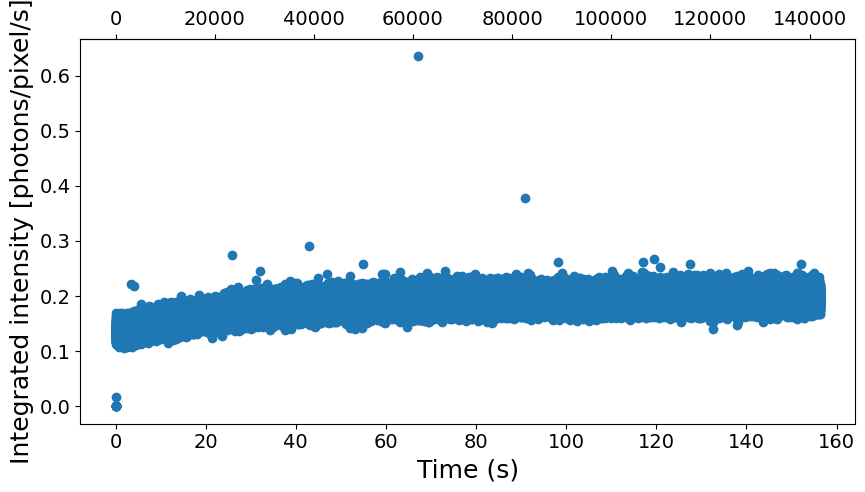

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(t_It, It, label='It')
plt.xlabel('Time (s)')
plt.ylabel('Integrated intensity [photons/pixel/s]')
plt.gca().secondary_xaxis('top', functions=(lambda x: x/itime, lambda x: x*itime))
#plt.yscale('log')

### Correlation

In [12]:
###################
Nfi = 40000
Nff = None
Lbin = None
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
###################
if Lbin is None: Lbin=1

G2t = XPCS.get_G2t(e4m_data, mask=mask, Nfi=Nfi, Nff=Nff, Lbin=Lbin)

Loading frames ...
Done! (elapsed time = 1.02 s)
Masking data ...
Done! (elapsed time = 2.18 s)
	 | 102112 frames X 1427140 pixels
	 | sparsity = 2.14e-04
	 | memory usage (sparse.csr_array @ float32) = 0.349 GB
Computing G2t (using MKL library)...
Done! (elapsed time = 4.56 s)
	 | 102112 X 102112 squared matrix
	 | memory usage (np.array @ float32) = 38.843 GB
Normalizing G2t (using NumExpr library)...


Done! (elapsed time = 4.06 s)



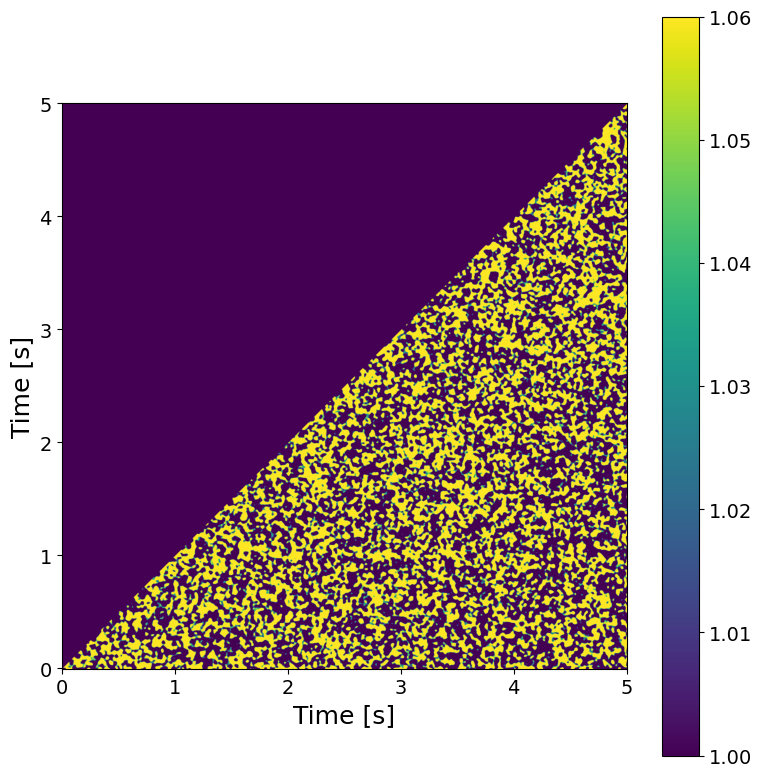

In [13]:
############################
t1, t2 = 0, 5
vmin, vmax = 1.0, 1.06
############################
XPCS.plot_G2t(G2t, vmin, vmax, itime=itime, t1=t1, t2=t2, sigma_filter=10)

In [14]:
################
Nbunch = 1
################

NfXbunch = int(G2t.shape[0]/Nbunch)
t, g2, t_mt, g2_mt = {}, {}, {}, {}
for n in range(Nbunch):
    t_bunch = round(itime*Lbin*NfXbunch*(n+1/2),1)
    t[t_bunch], g2[t_bunch] = XPCS.get_g2(itime*Lbin, np.array(G2t[NfXbunch*n:NfXbunch*(n+1), NfXbunch*n:NfXbunch*(n+1)]), cython=True)
    t_mt[t_bunch], g2_mt[t_bunch] = XPCS.get_g2mt_fromling2(itime*Lbin, g2[t_bunch])

if Nbunch == 1:
    np.savez(g2_folder+'g2_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t=t[t_bunch], g2=g2[t_bunch], t_mt=t_mt[t_bunch], g2_mt=g2_mt[t_bunch])   

Computing g2 (using cython code)...
Done! (elapsed time = 5.63 s)



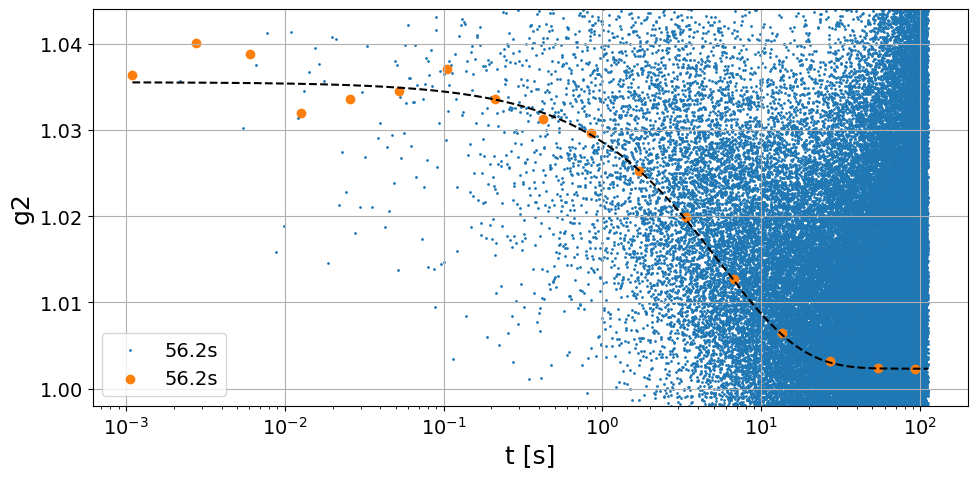

tau = 5.5269 +/- 0.6226
beta = 0.8482 +/- 0.0872
c = 0.0332 +/- 0.0024
y0 = 1.0023 +/- 0.0002


In [15]:
fit_out = pd.DataFrame(columns=['tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0']); fit_out.index.name = 't'

plt.figure(figsize=(10,5))
for k in g2.keys():
    if Nbunch == 1: plt.scatter(t[k], g2[k], s=1, label = str(k)+'s')
    plt.scatter(t_mt[k], g2_mt[k], label=str(k)+'s')

    popt, pcov = curve_fit(decorrelation_f, t[k], g2[k], p0=[3, .7, .03, 1], bounds=([0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf])) # TO BOUND THE FIT: t1_fit, t2_fit = 0, 1e10,  t[k] ->  t[k][(t1_fit<t[k])*(t[k]<t2_fit)]; g2[k] ->  g2[k][(t1_fit<t[k])*(t[k]<t2_fit)]
    fit_out.loc[k] = [popt[0], popt[1], popt[2], popt[3], np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1]), np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3])]
    
    X = np.arange(np.min(t[k]), np.max(t[k]), 1e-4)
    Y = decorrelation_f(X, *popt)
    plt.plot(X, Y, c='black', ls='--')

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.ylim(.998, 1.044)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

if Nbunch == 1:
    fit_out.to_csv(fit_out_folder+'fit_out_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'.csv')
    print(f'tau = { round(popt[0],4)} +/- {round(np.sqrt(pcov[0,0]),4)}')
    print(f'beta = {round(popt[1],4)} +/- {round(np.sqrt(pcov[1,1]),4)}')
    print(f'c = {   round(popt[2],4)} +/- {round(np.sqrt(pcov[2,2]),4)}')
    print(f'y0 = {  round(popt[3],4)} +/- {round(np.sqrt(pcov[3,3]),4)}')
else:
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    ax[0, 0].errorbar(fit_out.index, fit_out.tau,  yerr=fit_out.dtau, fmt='o')
    ax[0, 0].set_xlabel('t [s]')
    ax[0, 0].set_ylabel('$\\tau$ [s]')
    ax[0, 1].errorbar(fit_out.index, fit_out.beta,  yerr=fit_out.dbeta, fmt='o')
    ax[0, 1].set_xlabel('t [s]')
    ax[0, 1].set_ylabel('$\\beta$')
    ax[1, 0].errorbar(fit_out.index, fit_out.c,  yerr=fit_out.dc, fmt='o')
    ax[1, 0].set_xlabel('t [s]')
    ax[1, 0].set_ylabel('$c$')
    ax[1, 1].errorbar(fit_out.index, fit_out.y0,  yerr=fit_out.dy0, fmt='o')
    ax[1, 1].set_xlabel('t [s]')
    ax[1, 1].set_ylabel('$y_0$')
    plt.tight_layout()
    plt.show()

##   XPCS scan (Q =  0.13 Å$^{-1}$, delcoup = 1.00, 60 min @ 1ms (3600000fm, stopped @ 2600000) (GeO2_6q_delcoup1, dataset 1, scan 2) T = 30 $^{\circ}C $

In [16]:
#######################################
sample_name = 'GeO2_6q_delcoup_1'
Ndataset = 1
Nscan = 2
Nfi, Nff = None, 2600000 # stopped at 2600000
#######################################

scan = ID10.load_scan(raw_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
theta = scan['delcoup']
Q = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('theta =', theta)
print('Q =', Q)
print('#############################\n')

e4m_data = ID10.load_sparse_e4m(raw_folder, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )
e4m_data = COSMIC.fast_gamma_filter(e4m_data, Imaxth_high=5)

#############################
command = mtimescan 0.001 1 3599664
Ei = 9.699998837562536
itime = 0.0011
theta = 1.0000000000000004
Q = 0.09
#############################

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00001.h5 (2/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00002.h5 (3/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00003.h5 (4/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00004.h5 (5/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00005.h5 (6/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00006.h5 (7/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00007.h5 (8/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00008.h5 (9/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00009.h5 (10/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00010.h5 (11/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00011.h5 (12/521 loop

	 -> loading file eiger4m_v2_sparse_frame_0_00303.h5 (304/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00304.h5 (305/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00305.h5 (306/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00306.h5 (307/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00307.h5 (308/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00308.h5 (309/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00309.h5 (310/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00310.h5 (311/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00311.h5 (312/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00312.h5 (313/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00313.h5 (314/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00314.h5 (315/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00315.h5 (316/521 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00316.h5 (317/521 loops)
	 -> loading file eiger4m_v2_spars

### Qmask

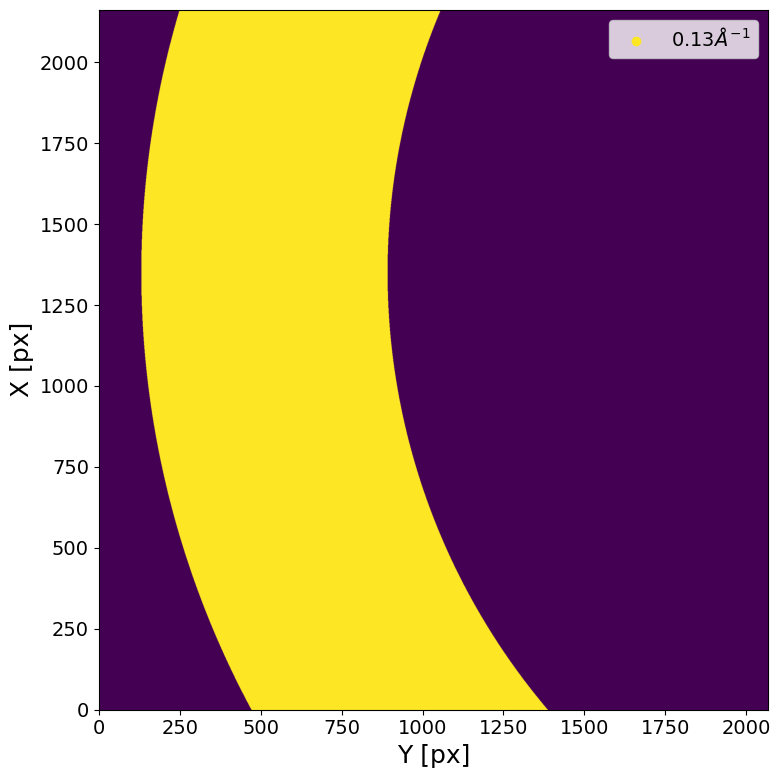

In [17]:
###################
Q    = .13
Qres = .02
###################

Qmask = XPCS.gen_Qmask(Ei, theta, Q, Qres, Qmap_plot=False)

### Flux check

################################################################################
Maximum count in the hull run -> 5.0
# of pixels above Ith_high treshold ->  2 pixels (of 4471016 => 0.0 %)
################################################################################



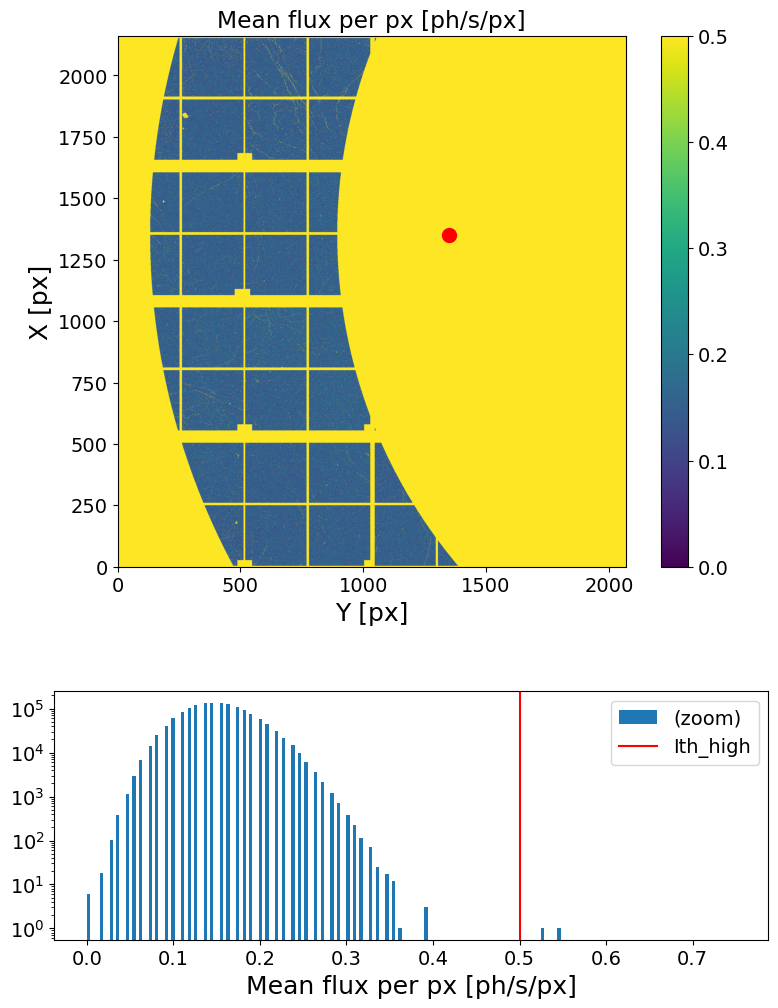

In [18]:
XPCS.gen_plots4mask(e4m_data, itime, Ith_high=.5, Nff=100000, mask=e4m_mask*e4m_htmask*bs_mask*Qmask)

### Intensity analysis

In [19]:
####################
Lbin = 1
Nstep = 100
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
####################

t_It, It = XPCS.get_It(e4m_data, itime, mask=mask, Lbin=Lbin, Nstep=Nstep)
np.savez(Idt_folder+'Idt_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t_It=t_It, It=It)

<SecondaryAxis: >

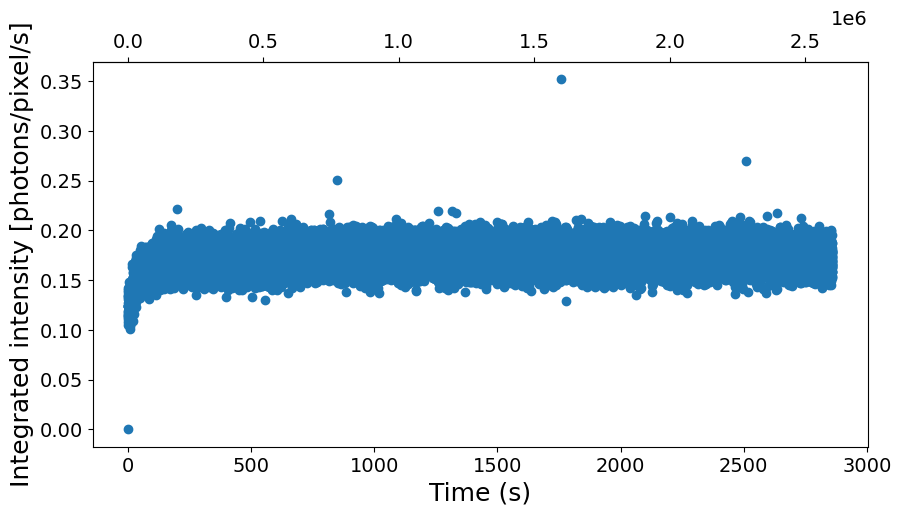

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(t_It, It, label='It')
plt.xlabel('Time (s)')
plt.ylabel('Integrated intensity [photons/pixel/s]')
plt.gca().secondary_xaxis('top', functions=(lambda x: x/itime, lambda x: x*itime))

### Correlation

In [120]:
XPCS.print_Nf_choices(e4m_data.shape[0])

       Nf = 2600000    =>    log2(Nf) = 21.31
----------------------------------------------------
  reduced Nf  dense depth (2^x)  Nf %  thrown frames
0      2**21                 21  19.3         502848
1    9*2**18                 18   9.0         240704
2   19*2**17                 17   4.0         109632
3   39*2**16                 16   2.0          44096
4   79*2**15                 15   0.0          11328
5  317*2**13                 13   0.0           3136
----------------------------------------------------


In [121]:
##### INPUTS #####
Nfi = 40000
Nff = 40000 + 2**21
sparse_depth = 12
dense_depth = 20
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
##################

G2tmt = XPCS.get_G2tmt_4sparse(e4m_data, sparse_depth, dense_depth=dense_depth, mask=mask, Nfi=Nfi, Nff=Nff)

Loading frames ...
Done! (elapsed time = 18.55 s)
Masking data ...
Done! (elapsed time = 37.7 s)
	 | 2097152 frames X 1463650 pixels
	 | sparsity = 1.90e-04
	 | memory usage (sparse.csr_array @ float32) = 6.535 GB
Computing sparse multitau G2t...


100%|██████████| 512/512 [02:18<00:00,  3.71it/s]


Done! (elapsed time = 139.5 s)
Computing dense multitau G2t...


100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

Done! (elapsed time = 3.5 s)


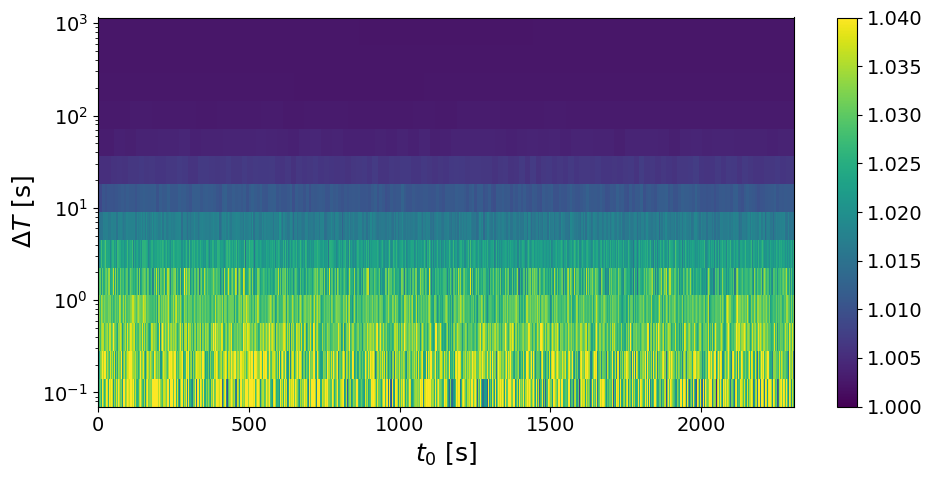

In [125]:
############################
vmin, vmax = 1.0, 1.04
lower_mt = 6
filter_layer = 10
############################

XPCS.plot_G2tmt(G2tmt, itime, vmin, vmax, yscale='log', lower_mt=lower_mt, filter_layer=filter_layer)

In [128]:
t_mt, g2_mt, dg2_mt = XPCS.get_g2mt(itime, G2tmt)

np.savez(g2_folder+'g2_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t_mt=t_mt, g2_mt=g2_mt, dg2_mt=dg2_mt)

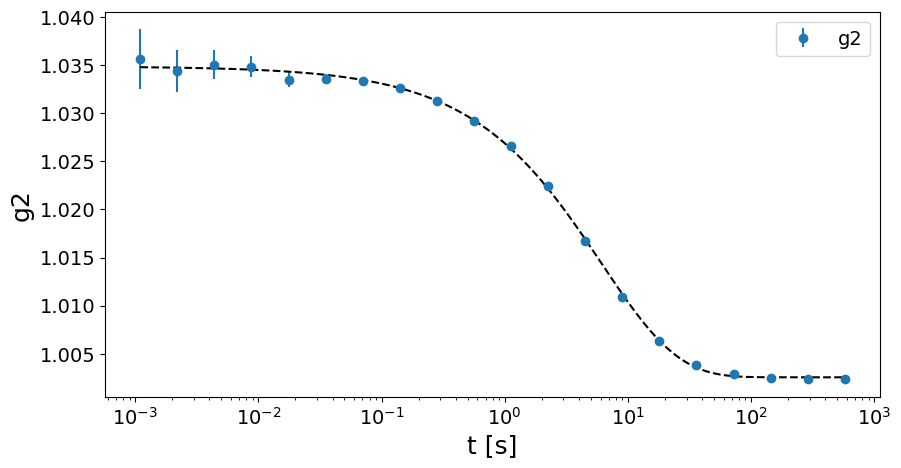

####### Fit parameters #######
tau = 6.0742 +/- 0.1994
beta = 0.6984 +/- 0.0195
c = 0.0323 +/- 0.0003
y0 = 1.0025 +/- 0.0002


In [131]:
plt.figure(figsize=(10,5))
fit_out = pd.DataFrame(columns=['tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
fit_out.index.name = 't'

plt.errorbar(t_mt, g2_mt, yerr=dg2_mt, fmt='o', label='g2')

popt, pcov = curve_fit(decorrelation_f, t_mt, g2_mt, sigma=None, p0=[3, .7, .02, 1], bounds=([0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf])) # TO BOUND THE FIT: t1_fit, t2_fit = 0, 1e10,  t[k] ->  t[k][(t1_fit<t[k])*(t[k]<t2_fit)]; g2[k] ->  g2[k][(t1_fit<t[k])*(t[k]<t2_fit)]
fit_out.loc[G2tmt[0].size*itime/2] = [popt[0], popt[1], popt[2], popt[3], np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1]), np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3])]
fit_out.to_csv(fit_out_folder+'fit_out_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'.csv')

X = np.arange(np.min(t_mt), np.max(t_mt), 1e-4)
Y = decorrelation_f(X, *popt)
plt.plot(X, Y, c='black', ls='--')

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.legend()
plt.show()


print('####### Fit parameters #######')
print(f'tau = { round(popt[0],4)} +/- {round(np.sqrt(pcov[0,0]),4)}')
print(f'beta = {round(popt[1],4)} +/- {round(np.sqrt(pcov[1,1]),4)}')
print(f'c = {   round(popt[2],4)} +/- {round(np.sqrt(pcov[2,2]),4)}')
print(f'y0 = {  round(popt[3],4)} +/- {round(np.sqrt(pcov[3,3]),4)}')

##   XPCS scan (Q =  0.293 Å$^{-1}$, delcoup = 3.00, 60 min @ 1ms (3600000fm) (GeO2_6q_delcoup3, dataset 1, scan 2) T = 30 $^{\circ}C $

In [7]:
#######################################
sample_name = 'GeO2_6q_delcoup_3'
Ndataset = 1
Nscan = 2
Nfi, Nff = None, None
#######################################

scan = ID10.load_scan(raw_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
theta = scan['delcoup']
Q = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('theta =', theta)
print('Q =', Q)
print('#############################\n')

e4m_data = ID10.load_sparse_e4m(raw_folder, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )
e4m_data = COSMIC.fast_gamma_filter(e4m_data, Imaxth_high=5)

#############################
command = mtimescan 0.001 1 3599664
Ei = 9.699998837562536
itime = 0.0011
theta = 3.0000000000000004
Q = 0.26
#############################

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00001.h5 (2/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00002.h5 (3/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00003.h5 (4/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00004.h5 (5/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00005.h5 (6/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00006.h5 (7/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00007.h5 (8/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00008.h5 (9/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00009.h5 (10/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00010.h5 (11/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00011.h5 (12/720 loop

### Qmask

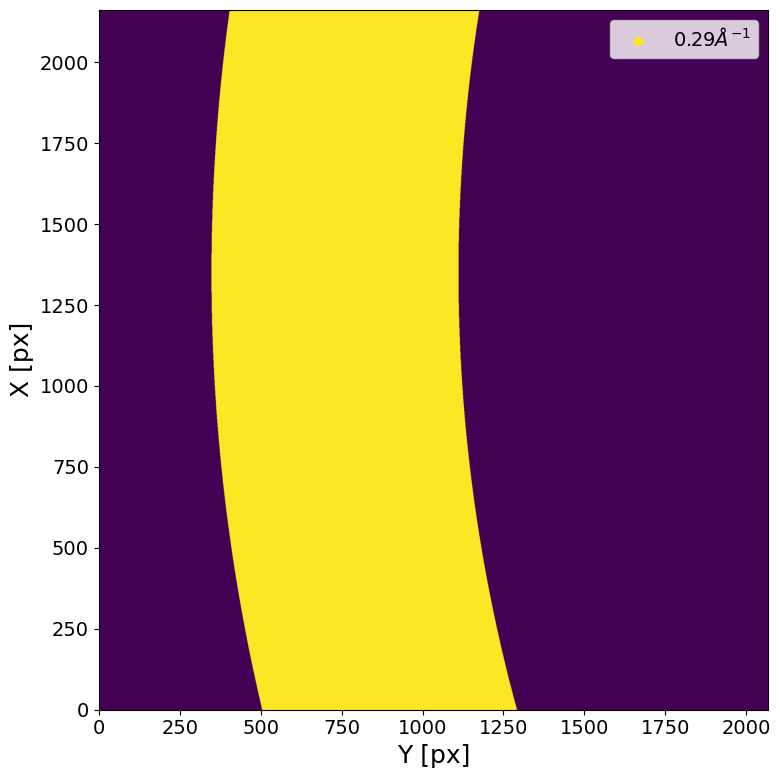

In [8]:
###################
Q    = .29
Qres = .02
###################

Qmask = XPCS.gen_Qmask(Ei, theta, Q, Qres, Qmap_plot=False)

### Flux check

################################################################################
Maximum count in the hull run -> 5.0
# of pixels above Ith_high treshold ->  51 pixels (of 4471016 => 0.0 %)
################################################################################



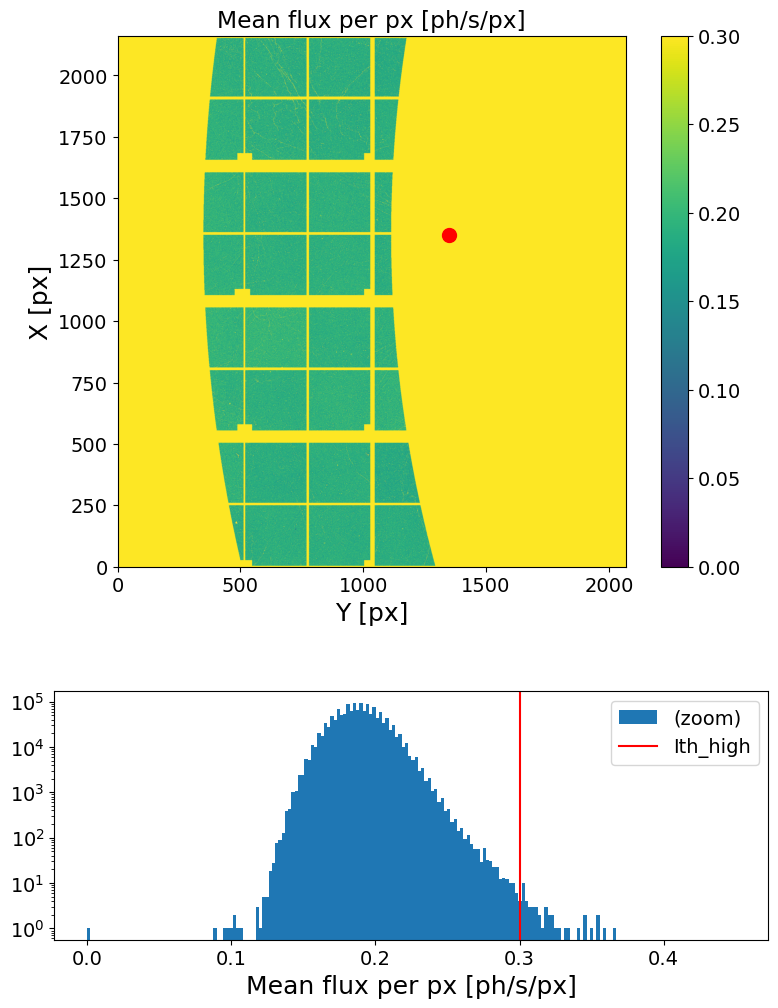

In [9]:
XPCS.gen_plots4mask(e4m_data, itime, Ith_high=.3, Nfi=int(1e6), Nff=int(1.3e6), mask=e4m_mask*e4m_htmask*bs_mask*Qmask)

### Intensity analysis

In [10]:
####################
Lbin = 1
Nstep = 100
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
####################

t_It, It = XPCS.get_It(e4m_data, itime, mask=mask, Lbin=Lbin, Nstep=Nstep)
np.savez(Idt_folder+'Idt_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t_It=t_It, It=It)

<SecondaryAxis: >

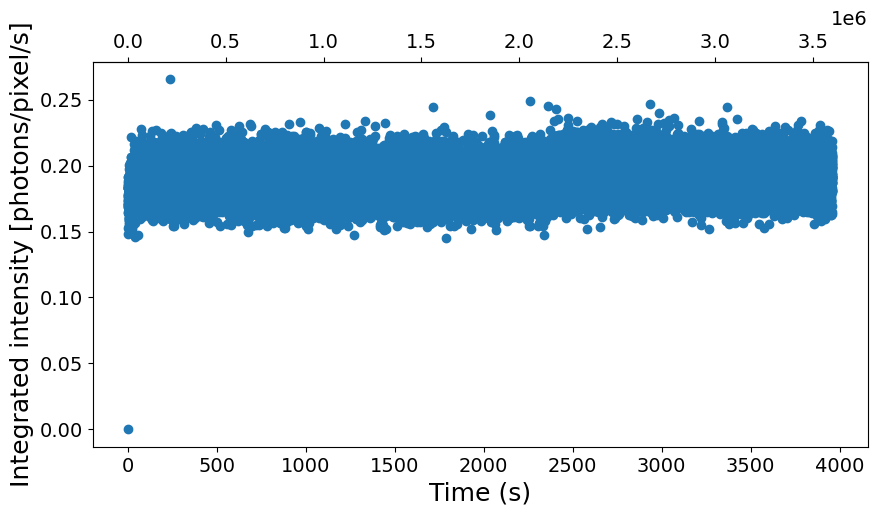

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(t_It, It, label='It')
plt.xlabel('Time (s)')
plt.ylabel('Integrated intensity [photons/pixel/s]')
plt.gca().secondary_xaxis('top', functions=(lambda x: x/itime, lambda x: x*itime))

### Correlation

In [12]:
XPCS.print_Nf_choices(e4m_data.shape[0])

       Nf = 3599664    =>    log2(Nf) = 21.78
----------------------------------------------------
  reduced Nf  dense depth (2^x)  Nf %  thrown frames
0      2**21                 21  41.7        1502512
1    3*2**20                 20  13.0         453936
2   13*2**18                 18   5.0         191792
3   27*2**17                 17   2.0          60720
4  109*2**15                 15   1.0          27952
5  219*2**14                 14   0.0          11568
6  439*2**13                 13   0.0           3376
----------------------------------------------------


In [13]:
##### INPUTS #####
Nfi = 40000
Nff = 40000 +  3*2**20
sparse_depth = 12
dense_depth = 20
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
##################

G2tmt = XPCS.get_G2tmt_4sparse(e4m_data, sparse_depth, dense_depth=dense_depth, mask=mask, Nfi=Nfi, Nff=Nff)

Loading frames ...


Done! (elapsed time = 28.03 s)
Masking data ...
Done! (elapsed time = 63.6 s)
	 | 3145728 frames X 1403639 pixels
	 | sparsity = 2.10e-04
	 | memory usage (sparse.csr_array @ float32) = 10.394 GB
Computing sparse multitau G2t...


100%|██████████| 768/768 [03:39<00:00,  3.49it/s]


Done! (elapsed time = 221.69 s)
Computing dense multitau G2t...


100%|██████████| 8/8 [00:03<00:00,  2.37it/s]

Done! (elapsed time = 5.4 s)


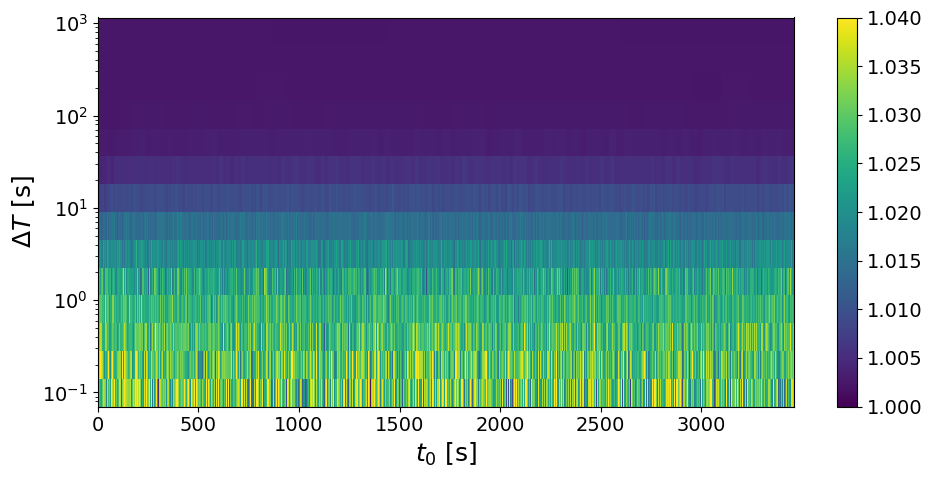

In [17]:
############################
vmin, vmax = 1.0, 1.04
lower_mt = 6
filter_layer = 10
############################

XPCS.plot_G2tmt(G2tmt, itime, vmin, vmax, yscale='log', lower_mt=lower_mt, filter_layer=filter_layer)

In [15]:
t_mt, g2_mt, dg2_mt = XPCS.get_g2mt(itime, G2tmt)

np.savez(g2_folder+'g2_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t_mt=t_mt, g2_mt=g2_mt, dg2_mt=dg2_mt)

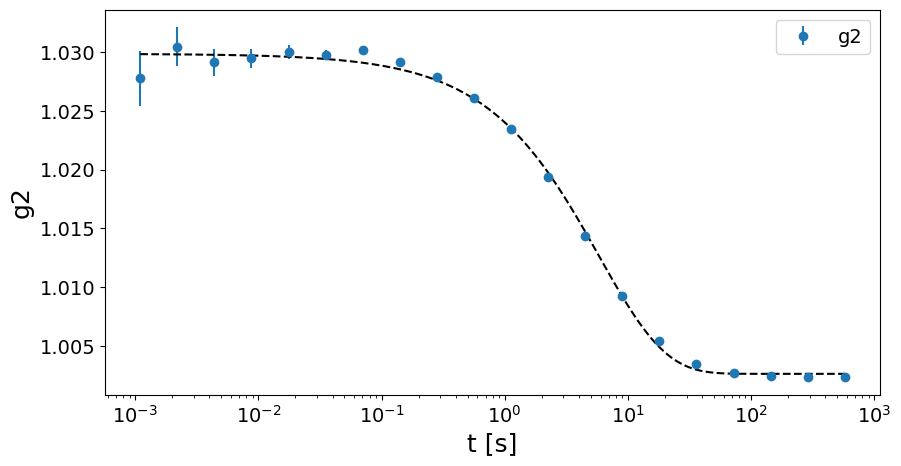

####### Fit parameters #######
tau = 5.8352 +/- 0.3648
beta = 0.8069 +/- 0.049
c = 0.0272 +/- 0.0005
y0 = 1.0026 +/- 0.0003


In [16]:
plt.figure(figsize=(10,5))
fit_out = pd.DataFrame(columns=['tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
fit_out.index.name = 't'

plt.errorbar(t_mt, g2_mt, yerr=dg2_mt, fmt='o', label='g2')

popt, pcov = curve_fit(decorrelation_f, t_mt, g2_mt, sigma=None, p0=[3, .7, .02, 1], bounds=([0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf])) # TO BOUND THE FIT: t1_fit, t2_fit = 0, 1e10,  t[k] ->  t[k][(t1_fit<t[k])*(t[k]<t2_fit)]; g2[k] ->  g2[k][(t1_fit<t[k])*(t[k]<t2_fit)]
fit_out.loc[G2tmt[0].size*itime/2] = [popt[0], popt[1], popt[2], popt[3], np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1]), np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3])]
fit_out.to_csv(fit_out_folder+'fit_out_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'.csv')

X = np.arange(np.min(t_mt), np.max(t_mt), 1e-4)
Y = decorrelation_f(X, *popt)
plt.plot(X, Y, c='black', ls='--')

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.legend()
plt.show()

print('####### Fit parameters #######')
print(f'tau = { round(popt[0],4)} +/- {round(np.sqrt(pcov[0,0]),4)}')
print(f'beta = {round(popt[1],4)} +/- {round(np.sqrt(pcov[1,1]),4)}')
print(f'c = {   round(popt[2],4)} +/- {round(np.sqrt(pcov[2,2]),4)}')
print(f'y0 = {  round(popt[3],4)} +/- {round(np.sqrt(pcov[3,3]),4)}')

##   XPCS scan (Q =  0.461 Å$^{-1}$, delcoup = 5.00, 60 min @ 1ms (3600000fm) (GeO2_6q_delcoup5, dataset 1, scan 2) T = 30 $^{\circ}C $

In [7]:
#######################################
sample_name = 'GeO2_6q_delcoup_5'
Ndataset = 1
Nscan = 2
Nfi, Nff = None, None
#######################################

scan = ID10.load_scan(raw_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
theta = scan['delcoup']
Q = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('theta =', theta)
print('Q =', Q)
print('#############################\n')

e4m_data = ID10.load_sparse_e4m(raw_folder, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )
e4m_data = COSMIC.fast_gamma_filter(e4m_data, Imaxth_high=5)

#############################
command = mtimescan 0.001 1 3599664
Ei = 9.699998837562536
itime = 0.0011
theta = 5.0
Q = 0.43
#############################

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00001.h5 (2/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00002.h5 (3/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00003.h5 (4/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00004.h5 (5/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00005.h5 (6/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00006.h5 (7/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00007.h5 (8/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00008.h5 (9/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00009.h5 (10/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00010.h5 (11/720 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00011.h5 (12/720 loops)
	 -> loading

### Qmask

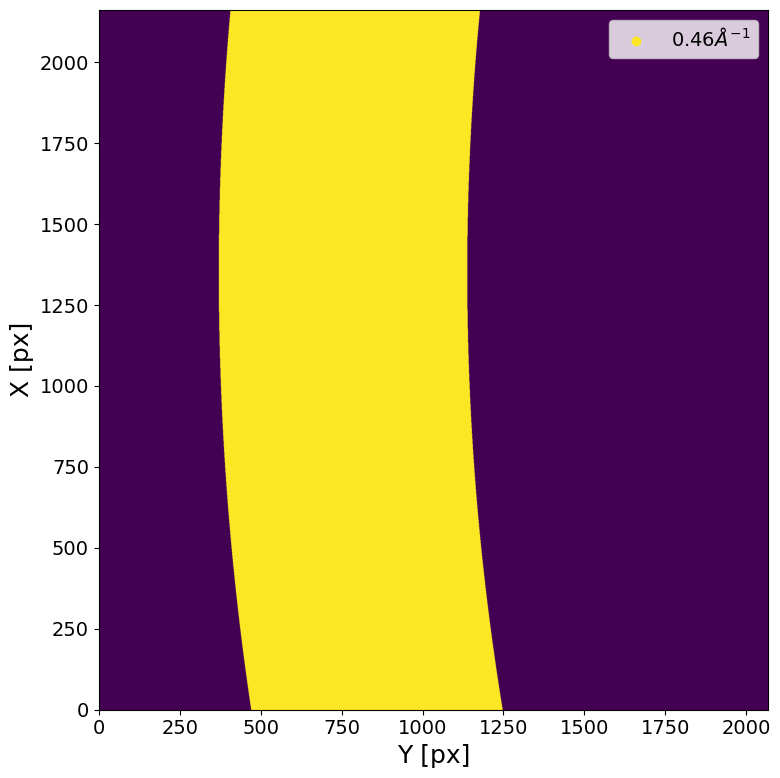

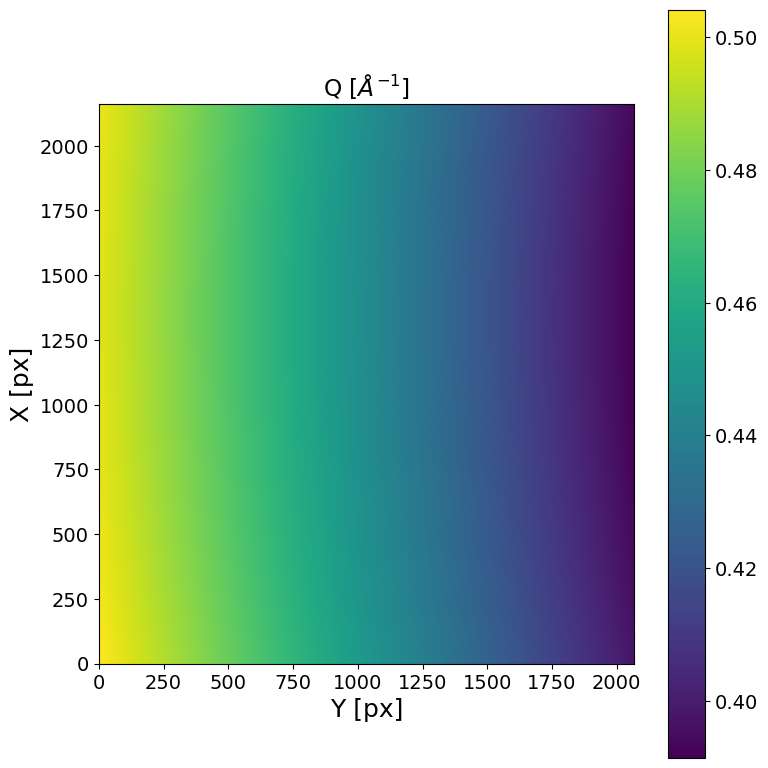

In [8]:
###################
Q    = .46
Qres = .02
###################

Qmask = XPCS.gen_Qmask(Ei, theta, Q, Qres, Qmap_plot=True)

### Flux check

################################################################################
Maximum count in the hull run -> 5.0
# of pixels above Ith_high treshold ->  320 pixels (of 4471016 => 0.02 %)
################################################################################



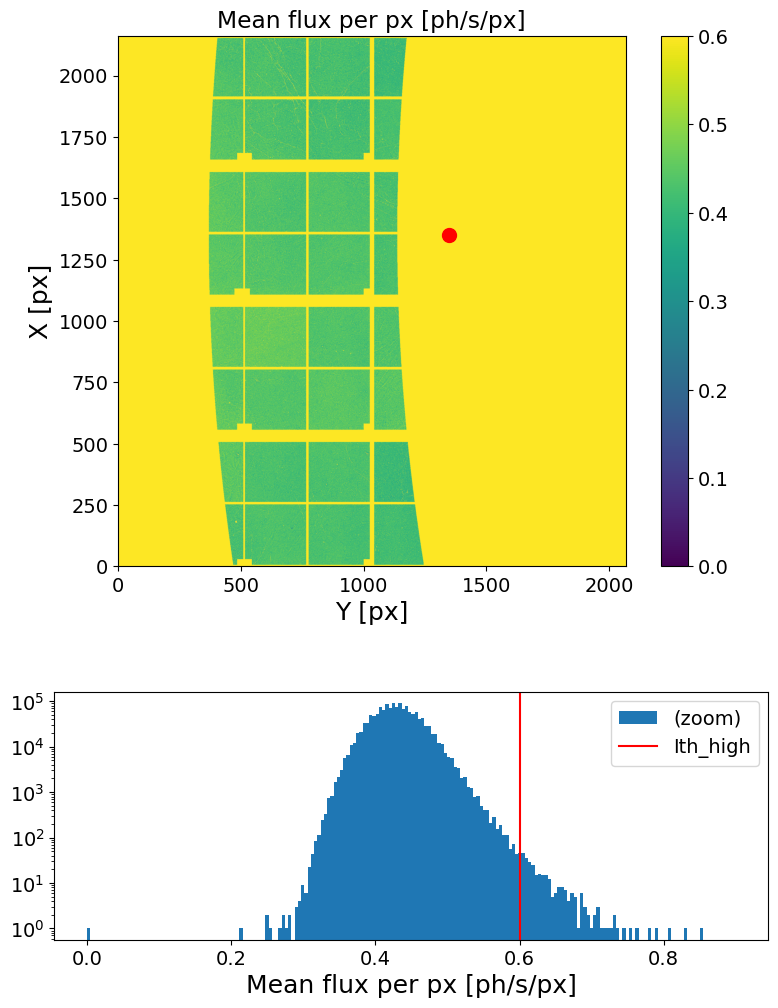

In [9]:
XPCS.gen_plots4mask(e4m_data, itime, Ith_high=.6, Nfi=int(1e5), Nff=int(1e6), mask=e4m_mask*e4m_htmask*bs_mask*Qmask)

### Intensity analysis

In [10]:
####################
Lbin = 1
Nstep = 100
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
####################

t_It, It = XPCS.get_It(e4m_data, itime, mask=mask, Lbin=Lbin, Nstep=Nstep)
np.savez(Idt_folder+'Idt_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t_It=t_It, It=It)

<SecondaryAxis: >

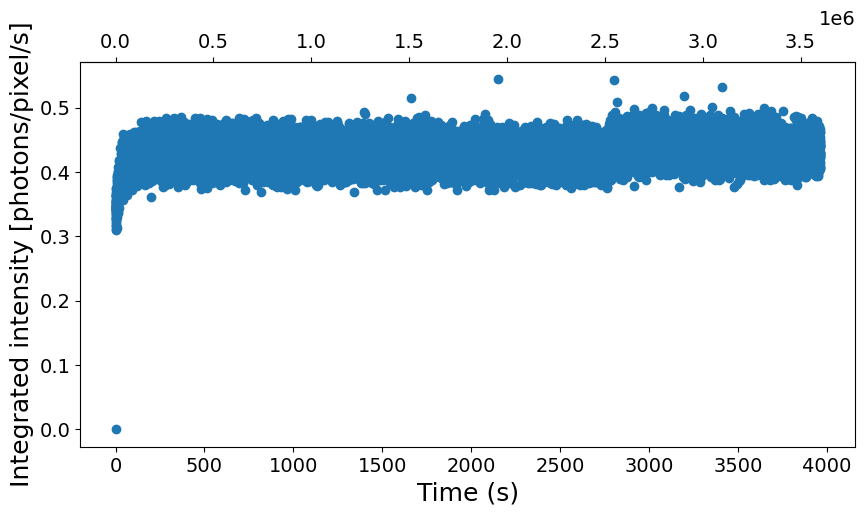

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(t_It, It, label='It')
plt.xlabel('Time (s)')
plt.ylabel('Integrated intensity [photons/pixel/s]')
plt.gca().secondary_xaxis('top', functions=(lambda x: x/itime, lambda x: x*itime))

### Correlation

In [32]:
XPCS.print_Nf_choices(e4m_data.shape[0])

       Nf = 3599664    =>    log2(Nf) = 21.78
----------------------------------------------------
  reduced Nf  dense depth (2^x)  Nf %  thrown frames
0      2**21                 21  41.7        1502512
1    3*2**20                 20  13.0         453936
2   13*2**18                 18   5.0         191792
3   27*2**17                 17   2.0          60720
4  109*2**15                 15   1.0          27952
5  219*2**14                 14   0.0          11568
6  439*2**13                 13   0.0           3376
----------------------------------------------------


In [ ]:
##### INPUTS #####
Nfi = 40000
Nff = 40000 +  3*2**20
sparse_depth = 12
dense_depth = 20
mask = None
##################

G2tmt = XPCS.get_G2tmt_4sparse(e4m_data, sparse_depth, dense_depth=dense_depth, mask=mask, Nfi=Nfi, Nff=Nff)

Loading frames ...
Done! (elapsed time = 108.9 s)
	 | 3145728 frames X 4471016 pixels
	 | sparsity = 4.09e-04
	 | memory usage (sparse.csr_array @ float32) = 64.24 GB
Computing sparse multitau G2t...


 92%|█████████▏| 707/768 [14:19<02:17,  2.26s/it]

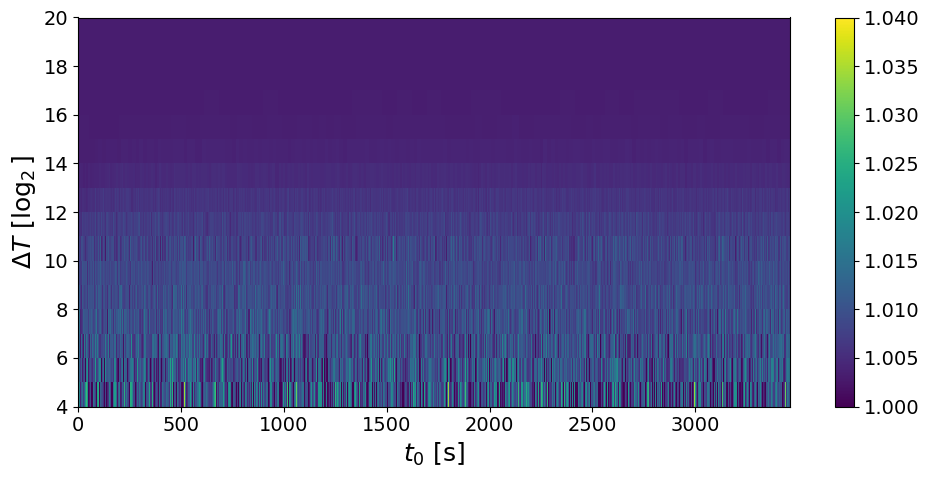

In [31]:
############################
vmin, vmax = 1.0, 1.04
lower_mt = 4
filter_layer = 10
############################

XPCS.plot_G2tmt(G2tmt, itime, vmin, vmax, yscale='log2', lower_mt=lower_mt, filter_layer=filter_layer)

In [15]:
t_mt, g2_mt, dg2_mt = XPCS.get_g2mt(itime, G2tmt)

np.savez(g2_folder+'g2_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t_mt=t_mt, g2_mt=g2_mt, dg2_mt=dg2_mt)

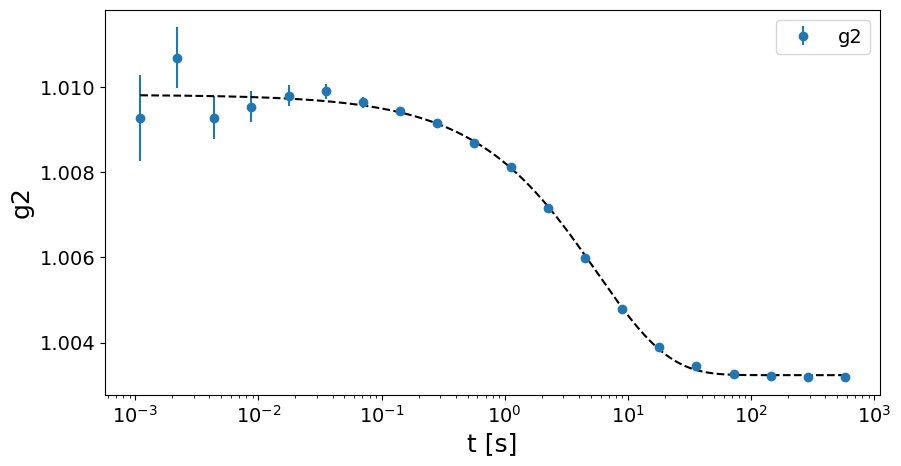

####### Fit parameters #######
tau = 5.5799 +/- 0.6553
beta = 0.7448 +/- 0.0793
c = 0.0066 +/- 0.0002
y0 = 1.0032 +/- 0.0001


In [16]:
plt.figure(figsize=(10,5))
fit_out = pd.DataFrame(columns=['tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
fit_out.index.name = 't'

plt.errorbar(t_mt, g2_mt, yerr=dg2_mt, fmt='o', label='g2')

popt, pcov = curve_fit(decorrelation_f, t_mt, g2_mt, sigma=None, p0=[3, .7, .02, 1], bounds=([0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf])) # TO BOUND THE FIT: t1_fit, t2_fit = 0, 1e10,  t[k] ->  t[k][(t1_fit<t[k])*(t[k]<t2_fit)]; g2[k] ->  g2[k][(t1_fit<t[k])*(t[k]<t2_fit)]
fit_out.loc[G2tmt[0].size*itime/2] = [popt[0], popt[1], popt[2], popt[3], np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1]), np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3])]
fit_out.to_csv(fit_out_folder+'fit_out_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4)+'.csv')

X = np.arange(np.min(t_mt), np.max(t_mt), 1e-4)
Y = decorrelation_f(X, *popt)
plt.plot(X, Y, c='black', ls='--')

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.legend()
plt.show()

print('####### Fit parameters #######')
print(f'tau = { round(popt[0],4)} +/- {round(np.sqrt(pcov[0,0]),4)}')
print(f'beta = {round(popt[1],4)} +/- {round(np.sqrt(pcov[1,1]),4)}')
print(f'c = {   round(popt[2],4)} +/- {round(np.sqrt(pcov[2,2]),4)}')
print(f'y0 = {  round(popt[3],4)} +/- {round(np.sqrt(pcov[3,3]),4)}')